<a href="https://colab.research.google.com/github/bankros/OPTIMIZACI-N-1/blob/main/proyecto_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROBLEMA DE OPTIMIZACIÓN CON RESTRICCIONES
## Programación no lineal
### Presentado: Kevin Rincón
### Profesor: Miguel Vargas
### UNIVERSIDAD DEL VALLE
En este nuevo proyecto se trabajará con unos problemas de optimización con restricciones, los cuales daremos su resolución explicada en la parte de progamación con los codigos dados en clases.

importaremos los siguientes paquetes:




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

# FUNCIÓN QUE VAMOS A OPTIMIZAR Y SUS CALCULOS.
La función a fin es: $F(x,y) = 0.26*(x^2+y^2) - 0.48*(x*y)$.

esta función es conocida como la Matyas fuction. Y las cotas  tiene las siguientes restricciones:

$-10\leq x\leq10$

$-10\leq y\leq10$









In [ ]:
def Matyas(x):
  return 0.26*((x[0]**2)+(x[1])**2) - 0.48*(x[0]*x[1])
#cotas
COTAS=optimize.Bounds([-10,-10], [10,10])

In [ ]:
COTAS

Bounds([-10, -10], [10, 10])

Se define la malla y la gráficamos

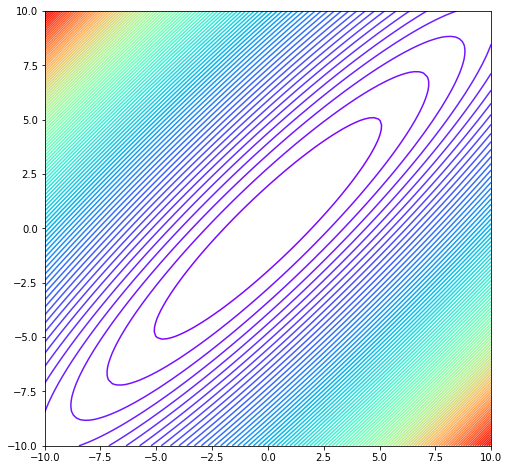

In [ ]:
# restriciones del dominio donde se mueve x,y
x_min, x_max = -10, 10
y_min, y_max = -10, 10
#particiones para el eje x, eje y 
#partición eje x
xx = np.linspace(x_min,x_max,100) 
#particion eje y
yy = np.linspace(y_min,y_max,100) 
#creación de la malla donde contiene los puntos de (x,y) 
X, Y = np.meshgrid(xx, yy) 
Z= Matyas([X,Y])

plt.figure(figsize=(8, 8))
plt.contour(X, Y, Z, 100, cmap="rainbow") 
plt.show()

Será necesario conocer el Jacobiano y la Hessiana de la función, para ello realizamos algunos cálculos manuales y definimos cada una de estas operaciones como se muestra:
Por lo tanto empecemos con el gradiente.
$$\nabla F(x,y)=\langle \frac{\partial F}{\partial x},\frac{\partial F}{\partial y}  \rangle$$
$\nabla F(x,y)= 0.56x-0.48y, 0.56y-0.48x$.

Seguimos con el jaccobiano:

$$ J_{R} (x,y)= \begin{pmatrix} 0.56x-0.48y  \\ 0.56y-0.48x   \end{pmatrix}  $$ 

luego el Hessiano:
$$ H_{R} (x,y)= \begin{pmatrix} 0.56 & -0.48  \\ -0.48 & 0.56 \end{pmatrix}  $$
 

In [ ]:
#Se define el jacobiano
def Jf(x):
  deri = np.zeros_like(x)
  deri[0]= (0.56*x[0]-0.48*x[1])
  deri[1]= (0.56*x[1]-0.48*x[0])
  return deri

In [ ]:
#Se define la Hessiana
def Hf(x):
  x = np.asarray(x)
  He = np.diag([0.56 , 0.56 ])
  He[1,0]= -0.48
  He[0,1]= -0.48
  return He

#Primer problema de optimización
Minimice la función: $f(x,y)$ sujeto a restricciones:

Restricción lineal:

$$-x-y\leq -1$$

$$y-x=2$$

Restricciones no lineal:
$$\frac{1}{4}*y^2 -x\leq 2$$

$$\frac{1}{6}x^3 -y\leq -1$$

# Restricción Lineal
veámolos en forma de un arreglo matricial de la siguiente forma:
$$\left[ \array{- \infty \\ -2 } \right] \leq \left[ \array{-1 & -1 \\ 1 & -1 } \right] \left[ \array{x \\ y } \right] \leq \left[ \array{-1 \\ 2 } \right] $$

Se define el código del anterior arreglo de restricciones de la siguiente manera usando el comando optimize.




In [ ]:
Rlineal = optimize.LinearConstraint([[-1,-1],[1,-1]],[-np.inf,-2],[-1,2])

# Restricción no lineal
Representamos las restricciones no lineales dadas en un arreglo matricial definiendo una función  de la siguiente manera:

$$C(x,y)= \left[ \array{\frac{1}{4}*y^2 -x\\ \frac{1}{6}*x^3 -y } \right]$$

$$\left[\array{-\infty \\ -\infty } \right] \leq C(x,y) \leq \left[ \array{2 \\ -1 } \right]$$

Definamos el codigo de la funcion C

In [ ]:
def C(X):
  return [0.25*(X[1]**2) - X[0] , 0.166*(X[0]**3) - X[1]]

In [ ]:
Rnolineal= optimize.NonlinearConstraint(C,[-np.inf,-np.inf],[2,-1])

In [ ]:
Rnolineal

# OPTIMIZACIÓN DEL PROBLEMA
Utilizando el codigo de optimize vamos a resolver nuestro problema.
los cual nos arroja el número de iteraciones que se demoró y cual es el optimo, que lo podemos encontrar como: "nit" las iteraciones y "x" como el optimo.

In [ ]:
x0=[-8,9]
liX=[]
liY=[]
liF=[]

def store(X,V):
    global liX
    global liY
    global liF
    x, y = X
    liX.append(x)
    liY.append(y)
    liF.append(Matyas(X))
res = optimize.minimize(Matyas, x0, method='trust-constr', jac=Jf, hess=Hf, constraints=[Rlineal, Rnolineal] , bounds=COTAS)

In [ ]:
res

 barrier_parameter: 6.400000000000003e-06
 barrier_tolerance: 6.400000000000003e-06
          cg_niter: 27
      cg_stop_cond: 1
            constr: [array([-1.88921772, -0.28285858]), array([-0.50830985, -1.00002873]), array([0.80317957, 1.08603815])]
       constr_nfev: [0, 66, 0]
       constr_nhev: [0, 0, 0]
       constr_njev: [0, 0, 0]
    constr_penalty: 1.0
  constr_violation: 0.0
    execution_time: 0.06296420097351074
               fun: 0.055693680777648524
              grad: array([-0.07151776,  0.22265517])
               jac: [array([[-1, -1],
       [ 1, -1]]), array([[-1.        ,  0.54301908],
       [ 0.32125853, -0.99999999]]), array([[1., 0.],
       [0., 1.]])]
   lagrangian_grad: array([6.82341499e-09, 2.19205229e-09])
           message: '`gtol` termination condition is satisfied.'
            method: 'tr_interior_point'
              nfev: 22
              nhev: 21
               nit: 27
             niter: 27
              njev: 21
        optimality: 6.823414

In [ ]:
res = optimize.minimize(Matyas, x0, callback=store , method='trust-constr', jac=Jf, hess=Hf, constraints=[Rlineal, Rnolineal] , bounds=COTAS)

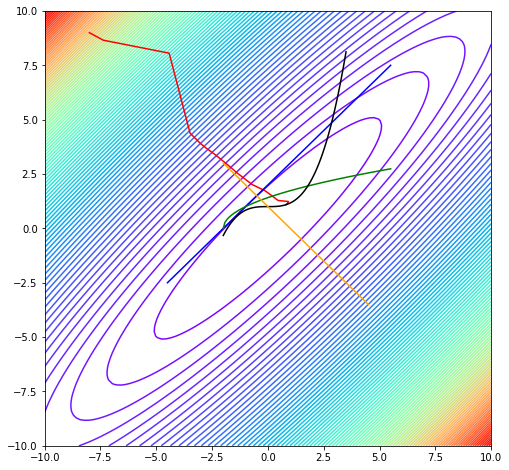

In [ ]:
from math import sqrt
#Haremos la gráfica nuevamente de la curva de nivel pero esta vez agregaremos los puntos guardados de la funcion store con las restricciones 
plt.figure(figsize=(8, 8))
plt.contour(X, Y, Z, 100, cmap="rainbow")
plt.plot(liX,liY,color='red') # cabe decir que esta son los puntos guardados en la funcion store


## Restricciones
s = np.linspace(-4.5, 5.5, 100)
plt.plot(s,2+s, color='blue')
w = np.linspace(-2, 5.5, 100)
plt.plot(w, np.sqrt(w+2), color='green')
f = np.linspace(-2, 3.5, 100)
plt.plot(f,0.166*f**3+1, color='black')
b = np.linspace(-2, 4.5, 100)
plt.plot(b,1-b, color='orange')
plt.show()

# segundo problema de optimizacion
Minimice la función: $f(x,y)$ sujeto a restricciones:

Restricción lineal:

$$10y +2x\leq-1 $$

$$5y-5x=3$$

Restricciones no lineal:
$$2cos(x)-2y\leq -1$$

$$10x^3-10y^2\leq -1$$

# restriccion lineal
veámolos en forma de un arreglo matricial de la siguiente forma:
$$\left[ \array{- \infty \\ -3 } \right] \leq \left[ \array{2 & -5 \\ 10 & 5 } \right] \left[ \array{x \\ y } \right] \leq \left[ \array{-1 \\ 3} \right] $$

Se define el código del anterior arreglo de restricciones de la siguiente manera usando el comando optimize.

In [ ]:
Rlineal1 = optimize.LinearConstraint([[2,-5],[10,5]],[-np.inf,-3],[-1,3])

 # Restricción no lineal
Representamos las restricciones no lineales dadas en un arreglo matricial definiendo una función  de la siguiente manera:

$$S(x,y)= \left[ \array{2cos(x)-2y\\ 10x^3-10y^2 } \right]$$

$$\left[\array{-\infty \\ -\infty } \right] \leq S(x,y) \leq \left[ \array{-1 \\ -1 } \right]$$

Definamos el codigo de la funcion S

In [ ]:
def S(X):
  return [2*np.cos(X[0]) - 2*X[1] , 10*(X[0]**3) - 10*X[1**2]]

In [ ]:
Rnolineal1= optimize.NonlinearConstraint(S,[-np.inf,-np.inf],[-1,-1])

# Optimización del segundo problema 
Utilizando el codigo de optimize vamos a resolver nuestro problema. los cual nos arroja el número de iteraciones que se demoró y cual es el optimo, que lo podemos encontrar como: "nit" las iteraciones y "x" como el optimo

In [ ]:
x1=[-5,3]
liX1=[]
liY1=[]
liF1=[]

def store1(X1,V1):
    global liX1
    global liY1
    global liF1
    x1, y1 = X1
    liX.append(x1)
    liY.append(y1)
    liF.append(Matyas(X1))
res = optimize.minimize(Matyas, x1, method='trust-constr', jac=Jf, hess=Hf, constraints=[Rlineal1, Rnolineal1] , bounds=COTAS)

In [ ]:
res

 barrier_parameter: 0.00016000000000000007
 barrier_tolerance: 0.00016000000000000007
          cg_niter: 31
      cg_stop_cond: 4
            constr: [array([-7.90642078,  2.99699103]), array([ -1.00032983, -14.86114237]), array([-0.40911915,  1.4176365 ])]
       constr_nfev: [0, 102, 0]
       constr_nhev: [0, 0, 0]
       constr_njev: [0, 0, 0]
    constr_penalty: 1.0
  constr_violation: 0.0
    execution_time: 0.13832592964172363
               fun: 0.844430118429238
              grad: array([-0.90957224,  0.99025363])
               jac: [array([[ 2, -5],
       [10,  5]]), array([[  0.79560266,  -2.        ],
       [  5.02135444, -10.00000002]]), array([[1., 0.],
       [0., 1.]])]
   lagrangian_grad: array([5.11505786e-09, 8.12881496e-09])
           message: '`gtol` termination condition is satisfied.'
            method: 'tr_interior_point'
              nfev: 34
              nhev: 20
               nit: 34
             niter: 34
              njev: 20
        optimality: 

In [ ]:
res = optimize.minimize(Matyas, x1, callback=store1 , method='trust-constr', jac=Jf, hess=Hf, constraints=[Rlineal1, Rnolineal1] , bounds=COTAS)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in sqrt
  if sys.path[0] == '':


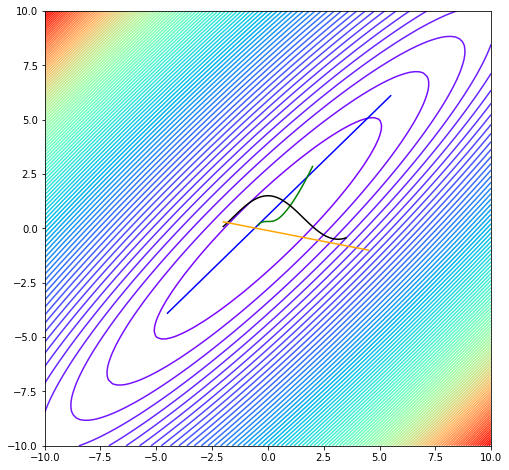

In [ ]:
from math import sqrt
#Haremos la gráfica nuevamente de la curva de nivel pero esta vez agregaremos los puntos guardados de la funcion store con las restricciones 
plt.figure(figsize=(8, 8))
plt.contour(X, Y, Z, 100, cmap="rainbow")
plt.plot(liX1,liY1,color='red') # cabe decir que esta son los puntos guardados en la funcion store


## Restricciones
s = np.linspace(-4.5, 5.5, 100)
plt.plot(s,s+0.6, color='blue')
w = np.linspace(-2, 2, 100)
plt.plot(w, np.sqrt(w**3+0.1), color='green')
f = np.linspace(-2, 3.5, 100)
plt.plot(f,np.cos(f)+0.5, color='black')
b = np.linspace(-2, 4.5, 100)
plt.plot(b,-0.2*b-0.1, color='orange')
plt.show()

# Conclusión


# Referencia
1.Heath, M. T. (2018). Scientific Computing: An Introductory Survey, Revised Second Edition. Society for Industrial and Applied Mathematics.

2.Chong, E. K., & Zak, S. H. (2004). An introduction to optimization. John Wiley & Sons